# Juypter Enviroment Setup

## Module Imports

In [1]:
import pandas as pd
import numpy as np
import requests
from urllib.request import urlretrieve
from tqdm import tqdm
import glob
import os
from pandas_profiling import ProfileReport
from zipfile import ZipFile
from io import BytesIO
from typing import Dict, List


## Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns
from  pandas_profiling import ProfileReport



from sklearn.model_selection import train_test_split,cross_validate,learning_curve,ShuffleSplit
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

## Juypter Extentions & Misc

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%matplotlib widget
#%matplotlib
#pd.set_option("display.max_columns",None)

# Params

In [3]:
BASEDATADIR='../data/'

# Collect Data

## Get Reference Data

In [4]:
df_refdata=pd.concat(map(pd.read_csv, glob.glob(os.path.join(BASEDATADIR, f'refdata/refdata.csv'))))

In [5]:
df_refdata

,ColumnName,ColumnDesc,ColumnStatus
0,Div,LeagueDivision,Columntype
1,Date,Match Date (dd/mm/yy),Matchinfo
2,Time,Time of match kick off,Matchinfo
3,HomeTeam,Home Team,Matchinfo
4,AwayTeam,Away Team,Matchinfo
...,...,...,...
120,AvgAHH,Market average Asian handicap home team odds,Oddsinfo
121,AvgAHA,Market average Asian handicap away team odds,Oddsinfo
122,PSCH,Pinnacle closing home odds,Oddsinfo
123,PSCD,Pinnacle closing draw odds,Oddsinfo


## Premiership Teams Data 

### Seasons 2014-2019 

#### From datahub.io  

Premiership Data for seasons from datahub.io in json

Seasons 2014-2019

https://datahub.io/sports-data/english-premier-league#resource-english-premier-league_zip
    

In [6]:
datahubio_urlzip='https://datahub.io/sports-data/english-premier-league/r/english-premier-league_zip.zip'
HUBIO_DATADIR="datahubio/"

def get_datahubio_data(basedir: str, datadir: str, url: str) -> pd.DataFrame:
    """[summary]
    Get data from datahubio and unzip and put data into a datahubio directory.
    Load data and return a dataframe
    """

    r = requests.get(url)
    if r.ok:
        z = ZipFile(BytesIO(r.content))
    print(f"{basedir}{datadir}")
    z.extractall(f"{basedir}{datadir}")
    df = pd.concat(
        map(pd.read_csv, glob.glob(os.path.join(basedir, f"{datadir}/data/*.csv")))
    )

    return df

In [7]:
# from datatable import dt 
# def get_datahubio_data_dt(basedir: str) -> pd.DataFrame:
    
#     url='https://datahub.io/sports-data/english-premier-league/r/english-premier-league_zip.zip'
#     r = requests.get(url)
#     if r.ok : 
#         z = ZipFile(BytesIO(r.content))  
#     z.extractall(f'{BASEDATADIR}/datahubio/')
#     df = pd.concat(map(dt.fread(anysource=file).to_pandas(), glob.glob(os.path.join(basedir, f'datahubio/data/*.csv'))))
    
#     return df 


In [8]:
%%time

df_hubio =get_datahubio_data(BASEDATADIR,HUBIO_DATADIR,datahubio_urlzip)

../data/datahubio/
CPU times: user 118 ms, sys: 23 ms, total: 141 ms
Wall time: 2.2 s


In [9]:
df_hubio 

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,LBA,SJH,SJD,SJA,BSH,BSD,BSA,SBH,SBD,SBA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,2010-05-09,Everton,Portsmouth,1,0,H,0,0,D,...,10.00,1.29,5.50,11.00,1.30,5.00,10.00,1.29,5.00,8.50
376,E0,2010-05-09,Hull,Liverpool,0,0,D,0,0,D,...,1.57,6.50,3.75,1.57,6.00,3.75,1.57,6.00,3.75,1.50
377,E0,2010-05-09,Man United,Stoke,4,0,H,2,0,H,...,19.00,1.11,9.00,21.00,1.11,7.50,23.00,1.11,7.50,15.00
378,E0,2010-05-09,West Ham,Man City,1,1,D,1,1,D,...,1.80,3.75,3.60,1.91,4.20,3.60,1.80,4.00,3.40,1.80


#### ~~From data.world data  - NOT BEING USED IN THE REST OF NOTEBOOK~~~

   
Premiership Data for seasons from data.world - Thanks to Chas Peacock

   Download : 
   - [2018-2019](https://query.data.world/s/v4fhwgn6hypbdg4wctbu6jiaifakxp)
   - [2017-2108](https://query.data.world/s/5zt47ynce4ufblqbsliludl5eyizkc)
   - [2016-2017](https://query.data.world/s/fzlebshvipjs532kas2yctcxjzc23) 
   - [2015-2016](<https://query.data.world/s/xjyyuqdqa36uweqxvjzpwrnydjlslf) 
   - [2014-2015](<https://query.data.world/s/s7tjy3tkhw5uatmnttarqos3mg33k3)


In [10]:

# datadir_dw=os.path.join(BASEDATADIR, f'dataworld/')
# def download_csv_data(datadir):
 
#     filetype='csv'    
#     urldict={
#             '2018-2019':'https://query.data.world/s/v4fhwgn6hypbdg4wctbu6jiaifakxp',
#             '2017-2018':'https://query.data.world/s/5zt47ynce4ufblqbsliludl5eyizkc', 
#             '2016-2017':'https://query.data.world/s/fzlebshvipjs532kas2yctcxjzc23y',
#             '2015-2016': 'https://query.data.world/s/xjyyuqdqa36uweqxvjzpwrnydjlslf',
#             '2014-2015':'https://query.data.world/s/s7tjy3tkhw5uatmnttarqos3mg33k3'
#         }

    

#         # get data from fat dat.world 
#     for key,value in urldict.items():
        
#         filename=f'{datadir}{key}.{filetype}'
#         if not os.path.isfile(filename):
#             df=pd.read_csv(value)
#             df.to_csv(filename)
#             print(f"downloading {filename}")
#         else :
#             print(f"Already exists {filename}")


In [11]:
# download_csv_data(datadir_dw)


In [12]:
# df_dw = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', f'{datadir_dw}/*.csv'))))

In [13]:
# df_dw.head(5)

### Season 2019-2020

#### From football-data.co.uk

Premiership Data for seasons from football-data

    2019-2020 - football-data.co.uk


In [14]:
## https://www.football-data.co.uk/mmz4281/2021/E0.csv 2020/2021 - Review design for screen scraping other leagues 
## https://www.football-data.co.uk/mmz4281/2122/E0.csv 2021/2022 - season not ended yet

fb_urlcsv='https://www.football-data.co.uk/mmz4281/1920/E0.csv'
FB_DATADIR="football-data/"
def get_football_co_uk_data(basedir: str, datadir: str, url: str) -> pd.DataFrame:
    """
    Get 2019/2020 data from football-data-co.uk and unzip and put data into a football directory.
    Load data and return a dataframe

    return DataFrame
    """
    datadir_fb = os.path.join(basedir, datadir)
    urlretrieve(
        url,
        f"{datadir_fb}2019-2020.csv",
    )[0]
    
    df_fd = pd.read_csv(f"{basedir}{datadir}2019-2020.csv")

    return df_fd


In [15]:
df_fd=get_football_co_uk_data(BASEDATADIR,FB_DATADIR,fb_urlcsv)

In [16]:
df_fd.head(5)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93


### Data Exploring & Merge Seasons 2014-2019 & Season 2020 

Using data from datahub.io and football-data.co.uk

### Merge Hubio and football-data.co.uk data

In [17]:
def merge_df_common_columns(df1: pd.DataFrame, df2: pd.DataFrame) -> pd.DataFrame:
    """
    merge football hubio data and football.co.uk data into one data frame where the column
    names are the SAME ONLY for new data frame.

    Need to check if I swap around df1 and df2 there are no issues


    ##### Need to review df1 and df2 logic. As if one has larger number of columns then need to append to dataframe
    #### with larger columns
    """

    fd_list = df1.columns.tolist()
    hubio_list = df2.columns.tolist()
    common_column_list = [i for i in fd_list if i in hubio_list]
    df_merged = pd.DataFrame(df1, columns=fd_list).append(
        pd.DataFrame(df2, columns=common_column_list), ignore_index=True
    )

    return df_merged

In [18]:
# Merge 2019-2020 to 2014-2019
df_merged=merge_df_common_columns(df_fd,df_hubio)

/var/folders/rk/bq7jzz8n0lvc9w7z1d5b87q40000gn/T/ipykernel_36234/2771328080.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_merged = pd.DataFrame(df1, columns=fd_list).append(


In [19]:
df_merged.shape

(4180, 106)

In [20]:
df_merged.head() 


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93


## Pandas Profile Report

In [21]:
#profile = ProfileReport(X, title="Pandas Profiling Report", explorative=True)
# profile = ProfileReport(df_merged, title="Pandas Profiling Report", minimal=True)
# profile.to_file("your_report.html")
# profile.to_widgets()

# Reduce Features

##  Keep on Match information columns 

Drop all  columns not to do with  "ColumnType"  == "MatchInfo". The rest are columns to do with odds by book makers  and asian handicap odds which add complexity (at the moment) to model

In [22]:
def refdata_columnstatus_criteria(
    df_ref: pd.DataFrame,
    df: pd.DataFrame,
    colvalue: str
) -> pd.DataFrame:
    """[summary]

    Args:
        df (pd.DataFrame): [Dataframe with all the column information]
        ColumnTypeValue (str): [Value of Column type to match]

    Returns:
        pd.DataFrame: [Dataframe with columns with "MatchInfo value"]
    """
    df_matchinfo_only = df.copy()
    df_ref.value_counts().nunique()
    keep_columns = list(
        df_ref.loc[
            df_ref["ColumnStatus"].str.contains("Matchinfo", case=False)
        ]["ColumnName"]
    )
    for col in df_matchinfo_only.columns:
        if col not in keep_columns:
            del df_matchinfo_only[col]

    return df_matchinfo_only

In [23]:
df_merged=refdata_columnstatus_criteria(df_refdata,df_merged,"Matchinfo")
df_merged

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,H,...,7,5,9,9,11,2,0,2,0,0
1,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,A,...,3,9,6,13,1,1,2,2,0,0
2,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,D,...,3,3,10,19,3,4,2,1,0,0
3,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,D,...,4,3,6,12,2,7,0,0,0,0
4,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,D,...,2,3,16,14,6,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,2010-05-09,NaN,Everton,Portsmouth,1,0,H,0,0,D,...,13,4,12,11,14,1,0,0,0,0
4176,2010-05-09,NaN,Hull,Liverpool,0,0,D,0,0,D,...,6,7,15,11,2,6,1,0,0,0
4177,2010-05-09,NaN,Man United,Stoke,4,0,H,2,0,H,...,13,4,10,4,10,2,2,0,0,0
4178,2010-05-09,NaN,West Ham,Man City,1,1,D,1,1,D,...,8,6,12,7,4,3,2,0,0,0


## Delete Referee

In [24]:
df_merged.drop(columns='Referee', inplace=True)

# Clean Data

## Duplicates

In [25]:
display(df_merged.shape)
df_merged.head(5)

(4180, 22)

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,H,...,7,5,9,9,11,2,0,2,0,0
1,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,A,...,3,9,6,13,1,1,2,2,0,0
2,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,D,...,3,3,10,19,3,4,2,1,0,0
3,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,D,...,4,3,6,12,2,7,0,0,0,0
4,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,D,...,2,3,16,14,6,2,2,1,0,1


In [26]:
# df_merged.drop_duplicates() == No duplicates
df_merged.duplicated().value_counts()

False    4180
dtype: int64

## Missing Data

In [28]:
# Pecentage of missing data in columns
df_missing=pd.DataFrame(df_merged.isnull().sum().sort_values(ascending=False) /len(df_merged) * 100, columns=['percentage'])

In [29]:
df_merged.isnull().sum().sort_values(ascending=False) /len(df_merged) * 100

Time        90.909091
Date         0.000000
HR           0.000000
AY           0.000000
HY           0.000000
AC           0.000000
HC           0.000000
AF           0.000000
HF           0.000000
AST          0.000000
HST          0.000000
AS           0.000000
HS           0.000000
HTR          0.000000
HTAG         0.000000
HTHG         0.000000
FTR          0.000000
FTAG         0.000000
FTHG         0.000000
AwayTeam     0.000000
HomeTeam     0.000000
AR           0.000000
dtype: float64

In [30]:
def drop_missing_data(df: pd.DataFrame, drop_percent: int) -> pd.DataFrame:
    """[summary]

    Args:
        df (pd.DataFrame): [description]
        pecentage (int): [description]

    Returns:
        pd.DataFrame: [description]
    """

    # Pecentage of missing data in columns

    df_dropped_missing = df.copy()
    df_missing_col = pd.DataFrame(
        df_dropped_missing.isnull().sum().sort_values(ascending=False) / len(df_dropped_missing) * 100,
        columns=["percentage"],
    )
    col_drop_list=list(df_missing_col[df_missing_col['percentage'] > drop_percent].index)

    for col in df_dropped_missing.columns:
        if col  in col_drop_list:
            del df_dropped_missing[col]

    return df_dropped_missing

In [31]:
df_merged=drop_missing_data(df_merged,90)

In [32]:
# Drop column 'time' time as 90% of value missing 
# df_merged.drop(columns='Time' , inplace=True)

In [33]:
df_merged.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR'],
      dtype='object')

In [34]:
# Column list of missing data only.
# collist=[i for i in list(df_missing[df_missing['percentage'] > 0.0]['index'])]

In [35]:
df_merged_style=df_merged.copy() 

In [36]:
# Styling a pandas data frame
# https://pandas.pydata.org/docs/user_guide/style.html
df_merged_style.describe().T.style.bar(
    subset=["mean"], color="#205ff2"
).background_gradient(subset=["std"], cmap="Reds").background_gradient(
    subset=["50%"], cmap="coolwarm"
)

,count,mean,std,min,25%,50%,75%,max
FTHG,4180.000000,1.565550,1.315783,0.000000,1.000000,1.000000,2.000000,9.000000
FTAG,4180.000000,1.182297,1.164306,0.000000,0.000000,1.000000,2.000000,9.000000
HTHG,4180.000000,0.692344,0.843078,0.000000,0.000000,0.000000,1.000000,5.000000
HTAG,4180.000000,0.524880,0.737407,0.000000,0.000000,0.000000,1.000000,5.000000
HS,4180.000000,14.103349,5.510488,0.000000,10.000000,14.000000,17.000000,43.000000
AS,4180.000000,11.244737,4.741074,0.000000,8.000000,11.000000,14.000000,30.000000
HST,4180.000000,5.881579,3.395885,0.000000,3.000000,5.000000,8.000000,24.000000
AST,4180.000000,4.694019,2.865897,0.000000,3.000000,4.000000,6.000000,20.000000
HF,4180.000000,10.606459,3.414411,0.000000,8.000000,10.500000,13.000000,24.000000
AF,4180.000000,11.119617,3.592959,1.000000,9.000000,11.000000,13.000000,26.000000


In [37]:
print(df_refdata.loc[df_refdata['ColumnName'].isin(list(df_merged_style.columns))])

   ColumnName                                         ColumnDesc ColumnStatus
1        Date                              Match Date (dd/mm/yy)    Matchinfo
3    HomeTeam                                          Home Team    Matchinfo
4    AwayTeam                                          Away Team    Matchinfo
5        FTHG                          Full Time Home Team Goals    Matchinfo
6        FTAG                          Full Time Away Team Goals    Matchinfo
7         FTR  Full Time Result (H=Home Win -  D=Draws - A=Aw...    Matchinfo
8        HTHG                          Half Time Home Team Goals    Matchinfo
9        HTAG                          Half Time Away Team Goals    Matchinfo
10        HTR  Half Time Result (H=Home Win -  D=Draw -  A=Aw...    Matchinfo
13         HS                                    Home Team Shots    Matchinfo
14         AS                                    Away Team Shots    Matchinfo
15        HST                          Home Team Shots on Target

## Outliers

In [38]:
df_refdata.loc[df_refdata['ColumnName'].isin( list(df_merged.columns))]

,ColumnName,ColumnDesc,ColumnStatus
1,Date,Match Date (dd/mm/yy),Matchinfo
3,HomeTeam,Home Team,Matchinfo
4,AwayTeam,Away Team,Matchinfo
5,FTHG,Full Time Home Team Goals,Matchinfo
6,FTAG,Full Time Away Team Goals,Matchinfo
7,FTR,Full Time Result (H=Home Win - D=Draws - A=Aw...,Matchinfo
8,HTHG,Half Time Home Team Goals,Matchinfo
9,HTAG,Half Time Away Team Goals,Matchinfo
10,HTR,Half Time Result (H=Home Win - D=Draw - A=Aw...,Matchinfo
13,HS,Home Team Shots,Matchinfo


<AxesSubplot:>

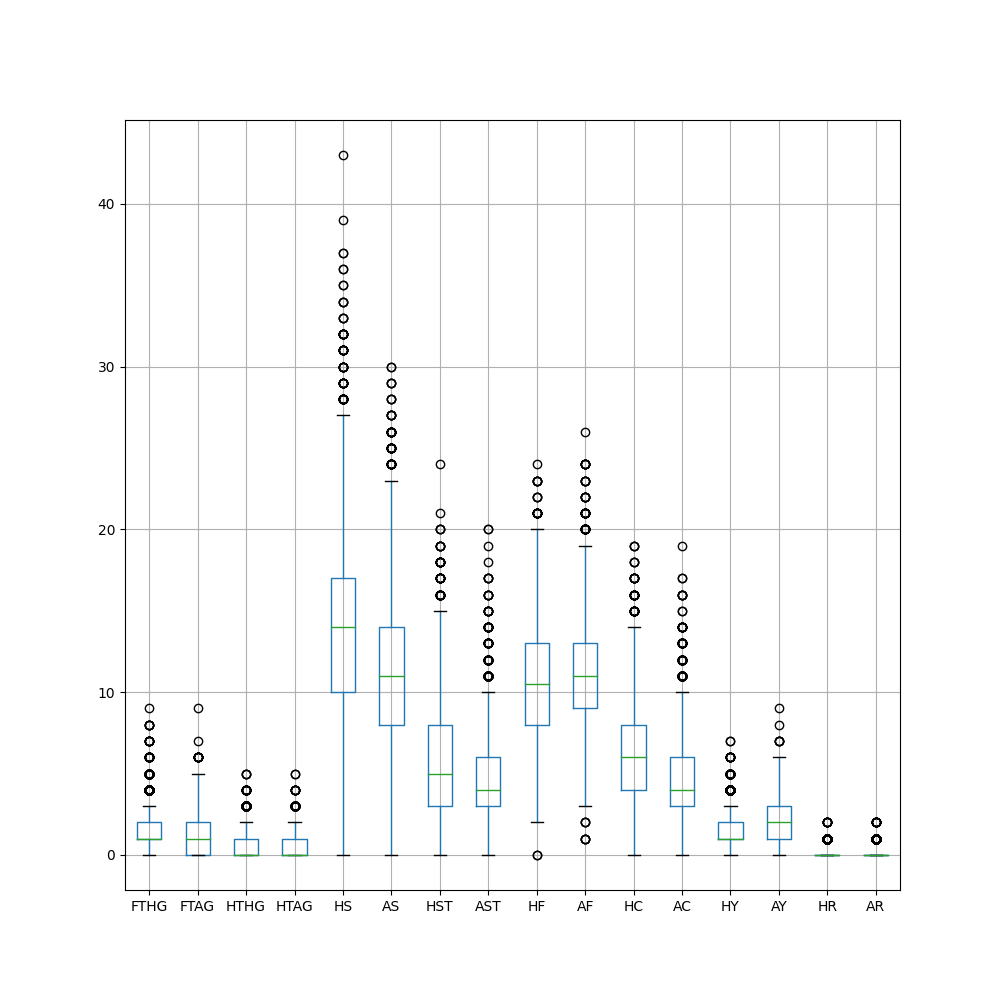

In [39]:
df_merged.boxplot(figsize=(10,10)) 

In [40]:
df_merged.dtypes

Date        object
HomeTeam    object
AwayTeam    object
FTHG         int64
FTAG         int64
FTR         object
HTHG         int64
HTAG         int64
HTR         object
HS           int64
AS           int64
HST          int64
AST          int64
HF           int64
AF           int64
HC           int64
AC           int64
HY           int64
AY           int64
HR           int64
AR           int64
dtype: object

## Scaling

### Standard Scaler 

In [41]:
df_merged.select_dtypes(include=['int64'])

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,4,1,4,0,15,12,7,5,9,9,11,2,0,2,0,0
1,0,5,0,1,5,14,3,9,6,13,1,1,2,2,0,0
2,1,1,0,0,13,8,3,3,10,19,3,4,2,1,0,0
3,3,0,0,0,10,11,4,3,6,12,2,7,0,0,0,0
4,0,0,0,0,6,10,2,3,16,14,6,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,1,0,0,0,21,10,13,4,12,11,14,1,0,0,0,0
4176,0,0,0,0,11,19,6,7,15,11,2,6,1,0,0,0
4177,4,0,2,0,18,4,13,4,10,4,10,2,2,0,0,0
4178,1,1,1,1,12,17,8,6,12,7,4,3,2,0,0,0


In [42]:
df_merged.values 

array([['09/08/2019', 'Liverpool', 'Norwich', ..., 2, 0, 0],
       ['10/08/2019', 'West Ham', 'Man City', ..., 2, 0, 0],
       ['10/08/2019', 'Bournemouth', 'Sheffield United', ..., 1, 0, 0],
       ...,
       ['2010-05-09', 'Man United', 'Stoke', ..., 0, 0, 0],
       ['2010-05-09', 'West Ham', 'Man City', ..., 0, 0, 0],
       ['2010-05-09', 'Wolves', 'Sunderland', ..., 2, 0, 2]], dtype=object)

In [43]:
##### Using StandScaler as less affected by outliers
std_scaler=StandardScaler() 


### MinMax Scaler 

In [44]:
#min_max_scaler=MinMaxScaler()


### Robust Scaler

In [45]:
#r_scaler=RobustScaler()

## Imputing

## Balancing

In [46]:
# Not Required

## Standardise Column types ( Use for later potentially) 

Want to use this later to see of an early kick off , weekday kick off , sunday ko affect teams


For now I am dropping date field. 

### Date Column 

**>>>>>>> For now I am dropping 'Date' column.   <<<<<**

In [47]:
df_merged.drop(columns='Date',inplace=True)

# Split date into year, month and day of week (i.e. Saturday, Sunday etc)

#df_merged['year']=pd.DatetimeIndex(df_merged['Date']).year
#df_merged['month']=pd.DatetimeIndex(df_merged['Date']).month
#df_merged['dayofweek']=pd.DatetimeIndex(df_merged['Date']).dayofweek



#df_merged[['Date','month','year','dayofweek']]

#df_merged.drop(columns=['Date'], inplace=True)



# Feature Engineering

## Encoding

In [48]:
#ohe=OneHotEncoder(sparse = False)

In [49]:
#df_merged.drop(columns=['Referee'], inplace=True, axis=1)

## Discretizing

## New Features

### Combine HTR & FTR

In [50]:
# String type attirbutes left half time result and full time result 
df_merged.select_dtypes(include=[np.object_])

,HomeTeam,AwayTeam,FTR,HTR
0,Liverpool,Norwich,H,H
1,West Ham,Man City,A,A
2,Bournemouth,Sheffield United,D,D
3,Burnley,Southampton,H,D
4,Crystal Palace,Everton,D,D
...,...,...,...,...
4175,Everton,Portsmouth,H,D
4176,Hull,Liverpool,D,D
4177,Man United,Stoke,H,H
4178,West Ham,Man City,D,D


In [51]:
df_merged[['HTR','FTR']].value_counts(ascending=True).reset_index(name='count')

,HTR,FTR,count
0,H,A,69
1,A,H,106
2,A,D,196
3,H,D,201
4,D,A,432
5,D,H,634
6,D,D,635
7,A,A,717
8,H,H,1190


In [52]:
#df_merged.groupby(['HTR','FTR']).size().reset_index().rename(columns={0:'count'})

def get_HTR_FTR_matrix(df : pd.DataFrame): 
    """
       1 =  HA -  Home time winning at half time (H). Away team wins at Full Time (A)
       2 =  AH -  Away Team Winning at half time (A). Home team Wins at full time  (H) 
       3 =  AD -  Away Team Winning at half time (A). Draw for Game (D)
       4 =  HD -  Home time winning at half time (H). Draw for Game (D)
       5 =  DA -  Draw at half time (D). Away team wins at Full Time (A)
       6 =  DH -  Draw at half time (D). Home team Wins at full time  (H)
       7 =  DD -  Draw at half time (D). Draw at full time (D)
       8 =  AA -  Away tea, wiming at half time (A). Away team wins at Full Time (A)
       9 =  HH -  Home time winning at half time (H). Home team Wins at full time  (H)
    """   
    results_matrix=df_merged[['HTR','FTR']].value_counts(ascending=True).reset_index(name='count').drop(columns='count')
    match_result_matrix=results_matrix['HTR'] + results_matrix['FTR']
    match_result_matrix.index= match_result_matrix.index + 1
    
    return {v:k for k,v in match_result_matrix.items()}

In [53]:
df_merged['combined_HTR_FTR']=df_merged['HTR'] + df_merged['FTR']

In [54]:
df_merged['combined_HTR_FTR'].replace(dict(get_HTR_FTR_matrix(df_merged)),inplace=True)

In [55]:
# df_merged[['HomeTeam','AwayTeam','HTR','FTR','combined_HTR_FTR']][df_merged['combined_HTR_FTR']==3]

In [56]:
#### df_merged.drop(columns=['HTR','FTR'],inplace=True)

## Export Processed Data

## Export dataframe

In [57]:
df_merged.to_csv(f'{BASEDATADIR}/processed/sbprocess.csv ',index=False,encoding='utf-8',header='true')

## Feature Correlation

<AxesSubplot:>

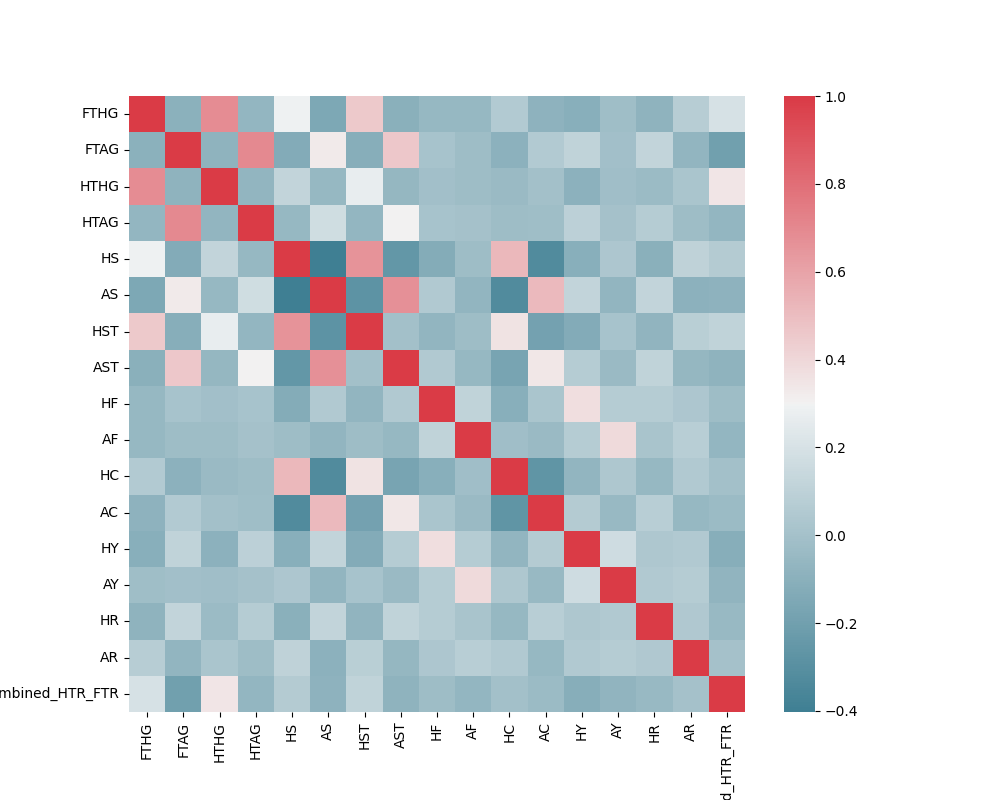

In [72]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_merged.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## Optimise  Dataframe size

In [59]:
def reduce_df_size(df: pd.DataFrame) -> pd.DataFrame: 
    ## downcasting loop
    for column in df.columns:

        if df[column].dtypes == 'float64':
             df[column]=pd.to_numeric(df[column], downcast='float')
        if df[column].dtypes == 'int64':
             df[column]=pd.to_numeric(df[column], downcast='integer')
    return df          

In [60]:
df_merged=reduce_df_size(df_merged)

In [61]:
# # first ten features volin image
# data_dia = y
# data = X
# data_n_2 = (data - data.mean()) / (data.std())              # standardization
# data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
# data = pd.melt(data,id_vars="diagnosis",
#                     var_name="features",
#                     value_name='value')
# plt.figure(figsize=(10,10))
# sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
# plt.xticks(rotation=90)

In [62]:
# fig, ax = plt.subplots(figsize=(12,10))
# #sns.heatmap(df_merged, annot=True)

# Model Creation

### LinearRegression (NOT USED Classifcation problem) 

In [63]:
#from sklearn.model_selection import cross_validate
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True)

### Instanciate the model
#lr_model = LinearRegression()

### Train the model on the Training data
#lr_model.fit(X_train, y_train)

### Score the model on the Testing data
#lr_model.score(X_test,y_test)

### Instanciate model
#lr_model = LinearRegression()

### 5-Fold Cross validate model
#cv_results = cross_validate(lr_model, X, y, cv=5)

### Scores
# cv_results['test_score']

### Mean of scores
#cv_results['test_score'].mean()

###  Logistic Regression

In [64]:
y=df_merged['combined_HTR_FTR']
X=df_merged.drop(columns=['combined_HTR_FTR','HomeTeam','AwayTeam','FTR','HTR'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True)

In [65]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [66]:
scaler.mean_
X_scaled = scaler.transform(X_train)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True)

logr_model = LogisticRegression(penalty='none', max_iter=1000)
logr_model.fit(X_scaled,y_train)

LogisticRegression(max_iter=1000, penalty='none')

In [68]:
pd.Series(logr_model.coef_.tolist()[0],index=X_scaled.columns).sort_values(ascending=False)

HTHG    40.389998
FTAG    40.353257
HR       2.677431
AC       1.187466
HY       1.122764
AST      0.349616
HST      0.032081
AY      -0.197240
HF      -0.226911
HC      -0.470635
AF      -0.481936
HS      -1.026802
AS      -1.114314
AR      -1.227551
FTHG   -34.872304
HTAG   -42.613075
dtype: float64

In [69]:
predictions = logr_model.predict(X_test)

In [70]:
predictions 

array([7, 8, 6, ..., 8, 9, 8], dtype=int8)

In [71]:
score = logr_model.score(X_test, y_test)
print(score)

0.7659420289855072


## Feature Reduction

## Re-Model

## Premiership Manager Data (New Notebook to be developed)

## Premiership Fan Sentiment (New Notebook to be developed)

## Player Data (New Notebook to be developed)